<a href="https://colab.research.google.com/github/Tirta2241720045/PCVK_Ganjil_2024/blob/main/Week9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Nama: Tirta Nurrochman Bintang Prawira
# NIM : 2241720045
# No: 27
# Kelas: TI-3A

1. Buka https://colab.research.google.com/. Setelah dipastikan bahwa google Colab
terhubung dengan Github Anda, lanjutkan dengan memilih repository yang telah
digunakan pada praktikum minggu lalu, rename file menjadi “Week9.ipynb”.
- Kemudian import folder yang ada di Drive Anda dengan cara sebagai berikut.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


- **`from google.colab import drive`**: Mengimpor modul untuk mengakses Google Drive.
- **`drive.mount('/content/drive')`**: Mengaitkan Google Drive ke direktori `/content/drive`. Anda akan diminta untuk otorisasi setelah menjalankan perintah ini.

2. Import beberapa library berikut yang akan digunakan selama uji coba praktikum
minggu ke-6 berikut.

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

1. **OpenCV (cv2)**: Digunakan untuk pemrosesan citra, termasuk membaca, menulis, dan menerapkan algoritma pengolahan citra.
  
2. **NumPy**: Digunakan untuk manipulasi array, memudahkan operasi matematis pada data citra.

3. **Matplotlib**: Digunakan untuk visualisasi data dan citra, memungkinkan Anda menampilkan gambar dan grafik.

3. Buatlah fungsi dilasi serta tampilkan hasil dilasi pada citra dengan Structuring Element
Dilasi (SED) berbentuk cross 3 x 3 tanpa menggunakan library morphology dari
openCV, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar
morphology.png)

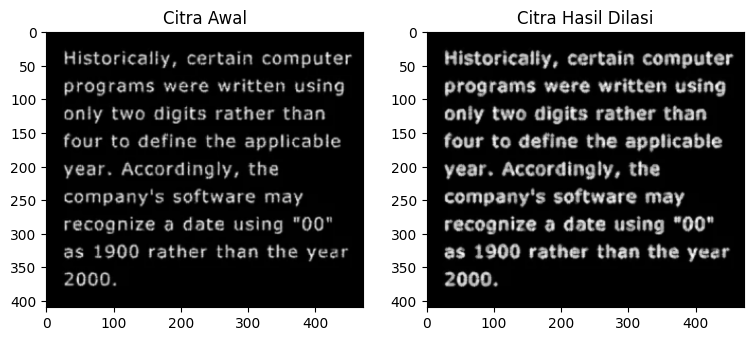

[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]


In [ ]:
# Input image
input_img = cv2.imread('/content/drive/MyDrive/dataset/Minggu8/morphology.png', cv2.IMREAD_GRAYSCALE)

# Membuat Structuring Element berbentuk cross 3x3
se_cross = np.array([[0, 1, 0],
                     [1, 1, 1],
                     [0, 1, 0]])

def morph_dilate(img, kernel):
    rows, cols = img.shape
    dilate_img = np.zeros((rows, cols))
    padded_img = np.pad(img, pad_width=1, mode='constant')

    for x in range(rows):
        for y in range(cols):
            dilate_img[x, y] = np.max(kernel * padded_img[x:x+3, y:y+3])

    return dilate_img

# Citra hasil dilasi
output_img = morph_dilate(input_img, se_cross)

# Menampilkan citra awal dan hasil dilasi
fig, axs = plt.subplots(1, 2, figsize=(9, 5))
axs[0].imshow(input_img, cmap='gray')
axs[0].set_title("Citra Awal")
axs[1].imshow(output_img, cmap='gray')
axs[1].set_title("Citra Hasil Dilasi")
plt.show()
print(se)

Dilasi pada citra teks mempertebal karakter dengan memperluas piksel terang. Kode di atas menggunakan kernel **cross 3x3** untuk mencari nilai maksimum di area lokal (3x3) tiap piksel. Hasilnya, pada citra kanan, teks tampak lebih **tebal** dan **jelas** dibandingkan citra awal.

4. Buatlah program implementasi operasi dilasi Structuring Element Dilasi (SED)
berbentuk cross 3 x 3 dengan menggunakan library morphology dari openCV,
sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar
morphology.png, dan cetak Structuring Element-nya)

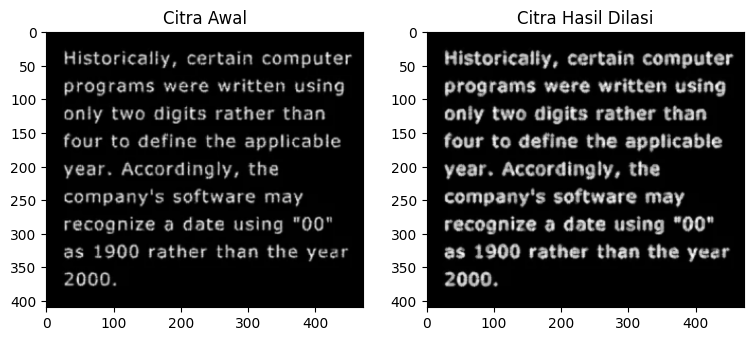

Structuring Element (Cross 3x3):
 [[0 1 0]
 [1 1 1]
 [0 1 0]]


In [ ]:
# Membaca gambar
input_img = cv2.imread('/content/drive/MyDrive/dataset/Minggu8/morphology.png', cv2.IMREAD_GRAYSCALE)

# Membuat Structuring Element berbentuk cross 3x3 menggunakan OpenCV
se_cross = cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3))

# Melakukan operasi dilasi menggunakan morphologyEx dari OpenCV
output_img = cv2.morphologyEx(input_img, cv2.MORPH_DILATE, se_cross)

# Menampilkan citra awal dan hasil dilasi
fig, axs = plt.subplots(1, 2, figsize=(9, 5))
axs[0].imshow(input_img, cmap='gray')
axs[0].set_title("Citra Awal")
axs[1].imshow(output_img, cmap='gray')
axs[1].set_title("Citra Hasil Dilasi")

plt.show()

# Cetak Structuring Element Cross
print("Structuring Element (Cross 3x3):\n", se_cross)

1. **Cara Pembuatan Structuring Element (SE):**  
   - **Kode 1:** SE dibuat manual dengan `np.array`.  
   - **Kode 2:** SE dibuat dengan `cv2.getStructuringElement`.

2. **Operasi Dilasi:**  
   - **Kode 1:** Dilasi dilakukan manual dengan perulangan dan `np.max`.  
   - **Kode 2:** Menggunakan `cv2.morphologyEx`, lebih ringkas dan efisien.

3. **Hasil Output:**  
   - Keduanya menghasilkan teks yang **lebih tebal**, tetapi kode kedua lebih cepat dan mudah dibaca.

5. Buatlah fungsi erosi serta tampilkan hasil erosi pada citra dengan Structuring Element
Erosi (SE) berbentuk square 5 x 5 tanpa menggunakan library morphology dari
openCV, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar
j.png)

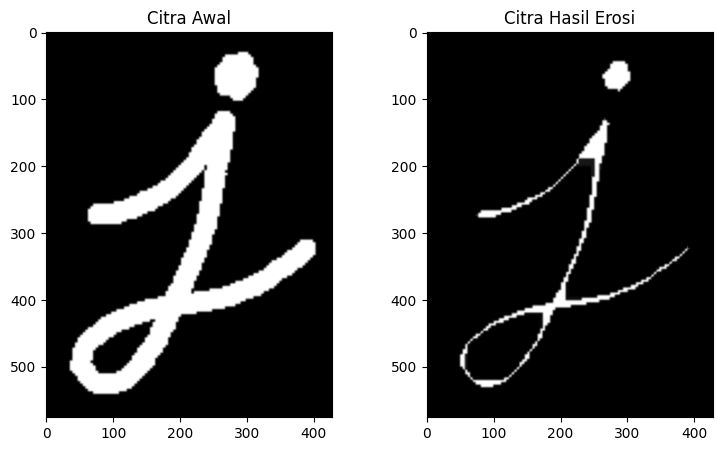

In [ ]:
# Input image
input_img = cv2.imread('/content/drive/MyDrive/dataset/Minggu8/j.png', cv2.IMREAD_GRAYSCALE)

# Membuat Structuring Element berbentuk square 5x5
se_square = np.ones((5, 5))

def morph_erode(img, kernel, iterations=3):
    rows, cols = img.shape
    erode_img = img.copy()

    for _ in range(iterations):  # Melakukan beberapa iterasi erosi untuk hasil lebih tipis
        padded_img = np.pad(erode_img, pad_width=2, mode='constant')
        temp_img = np.zeros_like(erode_img)
        for x in range(rows):
            for y in range(cols):
                temp_img[x, y] = np.min(kernel * padded_img[x:x+5, y:y+5])
        erode_img = temp_img

    return erode_img

# Citra hasil erosi (dilakukan beberapa kali agar hasil lebih tipis)
output_erosi = morph_erode(input_img, se_square, iterations=5)

# Menampilkan citra awal dan citra hasil erosi
fig, axs = plt.subplots(1, 2, figsize=(9, 5))

axs[0].imshow(input_img, cmap='gray')
axs[0].set_title("Citra Awal")

axs[1].imshow(output_erosi, cmap='gray')
axs[1].set_title("Citra Hasil Erosi")

plt.show()

Kode melakukan **erosi** pada citra menggunakan kernel **square 5x5** dan iterasi sebanyak 5 kali. Erosi mencari **nilai minimum** dalam area kernel, sehingga piksel terang di tepi objek hilang secara bertahap.

Pada citra hasil, huruf 'j' terlihat **lebih tipis** karena setiap iterasi mengurangi ketebalan dengan menghapus piksel-piksel di tepi. Semakin banyak iterasi, semakin tipis hasil erosi yang diperoleh.

6. Buatlah program implementasi operasi dilasi Structuring Element Erosi (SE) berbentuk
square 5 x 5 dengan menggunakan library morphology dari openCV, sehingga
menghasilkan tampilan seperti di bawah ini: (Gunakan gambar j.png)

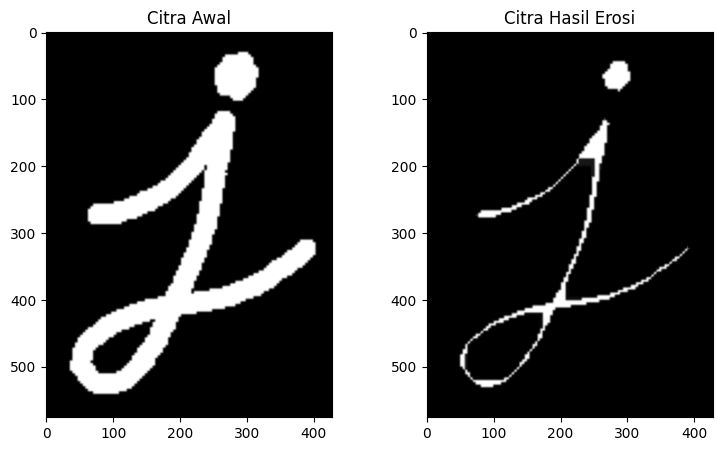

Structuring Element (Square 5x5):
 [[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]


In [ ]:
# Membaca gambar
input_img = cv2.imread('/content/drive/MyDrive/dataset/Minggu8/j.png', cv2.IMREAD_GRAYSCALE)

# Membuat Structuring Element berbentuk square 5x5 menggunakan OpenCV
se_square = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))

# Fungsi untuk melakukan erosi dengan beberapa iterasi
def erode_with_iterations(img, kernel, iterations=5):
    eroded_img = img.copy()
    for _ in range(iterations):
        eroded_img = cv2.morphologyEx(eroded_img, cv2.MORPH_ERODE, kernel)
    return eroded_img

# Melakukan operasi erosi dengan 5 iterasi
output_erosi = erode_with_iterations(input_img, se_square, iterations=5)

# Menampilkan citra awal dan hasil erosi
fig, axs = plt.subplots(1, 2, figsize=(9, 5))
axs[0].imshow(input_img, cmap='gray')
axs[0].set_title("Citra Awal")

axs[1].imshow(output_erosi, cmap='gray')
axs[1].set_title("Citra Hasil Erosi")

plt.show()

# Cetak Structuring Element yang digunakan
print("Structuring Element (Square 5x5):\n", se_square)

1. **Pembuatan Structuring Element (SE):**  
   - **Kode 1:** SE dibuat manual dengan `np.ones((5, 5))`.  
   - **Kode 2:** SE dibuat lebih ringkas menggunakan `cv2.getStructuringElement`.

2. **Implementasi Erosi:**  
   - **Kode 1:** Erosi dilakukan dengan perulangan manual menggunakan `np.min`.  
   - **Kode 2:** Erosi lebih efisien dengan `cv2.morphologyEx`.

3. **Iterasi:**  
   - **Kode 1:** Iterasi dilakukan dengan perulangan eksplisit di dalam fungsi manual.  
   - **Kode 2:** Iterasi lebih sederhana dengan memanggil fungsi `cv2.morphologyEx` di setiap loop.



7. Buatlah program implementasi operasi opening dengan Structuring Element
berbentuk square 3 x 3 tanpa dan dengan menggunakan library morphology dari
openCV, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar
fingerprint.png)

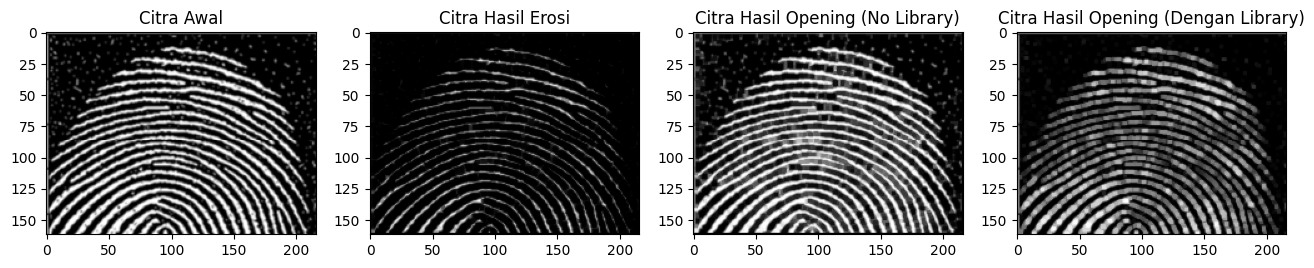

In [ ]:
# Membaca dan mengubah gambar menjadi grayscale
input_img = cv2.imread('/content/drive/MyDrive/dataset/Minggu8/fingerprint.png', cv2.IMREAD_GRAYSCALE)

# Membuat Structuring Element berbentuk square 3x3
se = np.ones((3, 3))

# Fungsi untuk melakukan erosi
def morph_erode(img, kernel):
    padded_img = np.pad(img, pad_width=1, mode='constant')
    rows, cols = img.shape
    erode_img = np.zeros_like(img)

    for x in range(rows):
        for y in range(cols):
            erode_img[x, y] = np.min(padded_img[x:x+3, y:y+3] * kernel)
    return erode_img

# Fungsi untuk melakukan opening
def morph_opening(img, kernel):
    return morph_erode(morph_dilate(img, kernel), kernel)

# Fungsi untuk melakukan dilasi
def morph_dilate(img, kernel):
    padded_img = np.pad(img, pad_width=1, mode='constant')
    rows, cols = img.shape
    dilate_img = np.zeros_like(img)

    for x in range(rows):
        for y in range(cols):
            dilate_img[x, y] = np.max(padded_img[x:x+3, y:y+3] * kernel)
    return dilate_img

# Citra hasil erosi (tanpa library)
output_erosi_no_library = morph_erode(input_img, se)

# Citra hasil opening (tanpa library)
output_opening_no_library = morph_opening(input_img, se)

# Citra hasil opening dengan library OpenCV
output_opening_with_library = cv2.morphologyEx(input_img, cv2.MORPH_OPEN, se)

# Menampilkan citra awal, hasil erosi, dan hasil opening
fig, axs = plt.subplots(1, 4, figsize=(16, 5))

axs[0].imshow(input_img, cmap='gray')
axs[0].set_title("Citra Awal")

axs[1].imshow(output_erosi_no_library, cmap='gray')
axs[1].set_title("Citra Hasil Erosi")

axs[2].imshow(output_opening_no_library, cmap='gray')
axs[2].set_title("Citra Hasil Opening (No Library)")

axs[3].imshow(output_opening_with_library, cmap='gray')
axs[3].set_title("Citra Hasil Opening (Dengan Library)")

plt.show()

Gambar menampilkan hasil **operasi morfologi** pada citra sidik jari menggunakan teknik erosi dan opening, baik dengan **fungsi manual** maupun **library OpenCV**. Berikut penjelasan:

1. **Citra Awal:**  
   - Merupakan sidik jari dalam bentuk grayscale yang akan diolah untuk menghilangkan noise dan memperjelas pola.

2. **Citra Hasil Erosi:**  
   - Menggunakan fungsi `morph_erode` yang mencari **nilai minimum** dalam area 3x3.  
   - Hasilnya menunjukkan bagian terang (ridge) **menipis**, dan beberapa noise di latar belakang ikut menghilang.

3. **Citra Hasil Opening (No Library):**  
   - Proses **opening manual** menggabungkan **dilasi** setelah erosi (`morph_opening`).  
   - Hasilnya terlihat lebih halus karena noise kecil berhasil dihilangkan, namun detail ridge tetap dipertahankan.

4. **Citra Hasil Opening (Dengan Library):**  
   - Menggunakan `cv2.morphologyEx` dengan parameter `cv2.MORPH_OPEN`.  
   - Hasil serupa dengan metode manual, tetapi lebih efisien dan cepat karena memanfaatkan fungsi bawaan OpenCV.

**Kesimpulan:**  
Kedua metode opening (manual dan library) memberikan efek yang mirip, yaitu mengurangi noise tanpa menghilangkan pola utama. Metode menggunakan library lebih praktis dan direkomendasikan untuk **pemrosesan skala besar**.

8. Buatlah program implementasi operasi closing dengan Structuring Element berbentuk
square 3 x 3 tanpa dan dengan menggunakan library morphology dari openCV,
sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar
fingerprint.png)

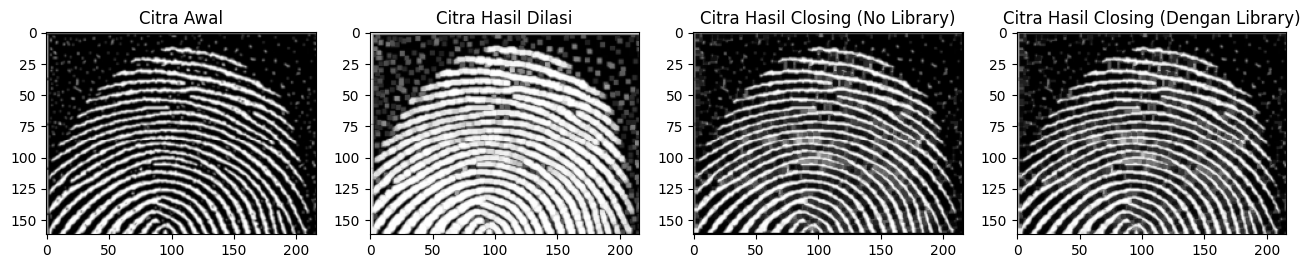

In [ ]:
# Membaca dan mengubah gambar menjadi grayscale
input_img = cv2.imread('/content/drive/MyDrive/dataset/Minggu8/fingerprint.png', cv2.IMREAD_GRAYSCALE)

# Membuat Structuring Element berbentuk square 3x3
se = np.ones((3, 3))

# Fungsi untuk melakukan dilasi
def morph_dilate(img, kernel):
    padded_img = np.pad(img, pad_width=1, mode='constant')
    rows, cols = img.shape
    dilate_img = np.zeros_like(img)

    for x in range(rows):
        for y in range(cols):
            dilate_img[x, y] = np.max(padded_img[x:x+3, y:y+3] * kernel)
    return dilate_img

# Fungsi untuk melakukan erosi
def morph_erode(img, kernel):
    padded_img = np.pad(img, pad_width=1, mode='constant')
    rows, cols = img.shape
    erode_img = np.zeros_like(img)

    for x in range(rows):
        for y in range(cols):
            erode_img[x, y] = np.min(padded_img[x:x+3, y:y+3] * kernel)
    return erode_img

# Fungsi untuk melakukan closing (dilasi diikuti oleh erosi)
def morph_closing(img, kernel):
    dilated_img = morph_dilate(img, kernel)
    return morph_erode(dilated_img, kernel)

# Citra hasil dilasi (tanpa library)
output_dilasi_no_library = morph_dilate(input_img, se)

# Citra hasil closing (tanpa library)
output_closing_no_library = morph_closing(input_img, se)

# Citra hasil closing dengan library OpenCV
output_closing_with_library = cv2.morphologyEx(input_img, cv2.MORPH_CLOSE, se)

# Menampilkan citra awal, hasil dilasi, dan hasil closing
fig, axs = plt.subplots(1, 4, figsize=(16, 5))

axs[0].imshow(input_img, cmap='gray')
axs[0].set_title("Citra Awal")

axs[1].imshow(output_dilasi_no_library, cmap='gray')
axs[1].set_title("Citra Hasil Dilasi")

axs[2].imshow(output_closing_no_library, cmap='gray')
axs[2].set_title("Citra Hasil Closing (No Library)")

axs[3].imshow(output_closing_with_library, cmap='gray')
axs[3].set_title("Citra Hasil Closing (Dengan Library)")

plt.show()

1. **Citra Awal:** Menampilkan sidik jari dengan pola garis (ridge) dan sedikit noise di latar belakang.

2. **Citra Hasil Dilasi:** Pola ridge menjadi lebih tebal karena setiap piksel diperluas dengan nilai maksimum dalam area 3x3, namun noise ikut menonjol.

3. **Citra Hasil Closing (No Library):** Kombinasi dilasi dan erosi secara manual. Pola ridge lebih rapi, dan noise kecil berhasil dihilangkan.

4. **Citra Hasil Closing (Dengan Library):** Menghasilkan efek yang sama seperti manual, namun lebih efisien dengan penggunaan fungsi bawaan OpenCV.

**Kesimpulan:**  
Dilasi mempertebal pola, sedangkan closing merapikan dan mengurangi noise kecil. Library OpenCV lebih cepat dan praktis untuk digunakan.

9. Buatlah program implementasi operasi dilasi dengan Structuring Element berbentuk
Cross 3 x 3 dan 5 x 5, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan
gambar j.png)


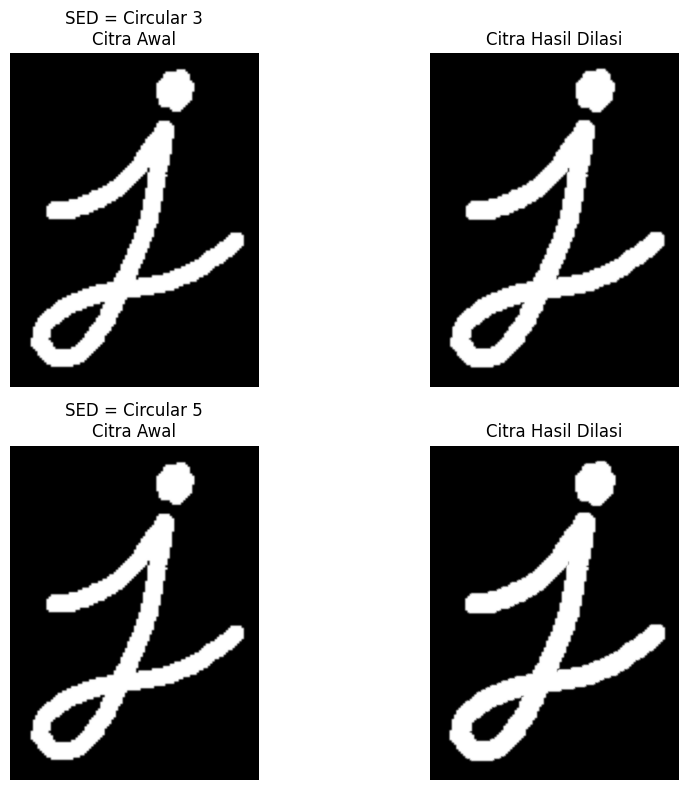

In [ ]:
# Membaca citra
img = cv2.imread('/content/drive/MyDrive/dataset/Minggu8/j.png')

# Membuat Structuring Element berbentuk Circular 3x3
se_circular3x3 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
# Melakukan dilasi dengan SE Circular 3x3
dilasi_circular_3x3 = cv2.dilate(img, se_circular3x3, iterations=1)

# Membuat Structuring Element berbentuk Circular 5x5
se_circular5x5 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
# Melakukan dilasi dengan SE Circular 5x5
dilasi_circular_5x5 = cv2.dilate(img, se_circular5x5, iterations=1)

# Menampilkan citra dengan format yang diinginkan
plt.figure(figsize=(10, 8))

# Baris pertama: SE Circular 3x3
plt.subplot(2, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('SED = Circular 3\nCitra Awal')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(cv2.cvtColor(dilasi_circular_3x3, cv2.COLOR_BGR2RGB))
plt.title('Citra Hasil Dilasi')
plt.axis('off')

# Baris kedua: SE Circular 5x5
plt.subplot(2, 2, 3)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('SED = Circular 5\nCitra Awal')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(cv2.cvtColor(dilasi_circular_5x5, cv2.COLOR_BGR2RGB))
plt.title('Citra Hasil Dilasi')
plt.axis('off')

plt.tight_layout()
plt.show()

1. **Citra Awal (SE Circular 3x3):**
   - Menampilkan citra asli yang akan diolah.
   - Structuring element berbentuk lingkaran 3x3 digunakan untuk dilasi.

2. **Citra Hasil Dilasi (SE Circular 3x3):**
   - Citra mengalami dilasi menggunakan structuring element 3x3, di mana piksel-piksel putih pada citra diperluas ke arah luar.
   - Akibatnya, area putih menjadi lebih besar dan lebih padat.

3. **Citra Awal (SE Circular 5x5):**
   - Menampilkan citra asli sekali lagi, dengan structuring element yang lebih besar.
   - Structuring element berbentuk lingkaran 5x5 akan memberikan efek yang lebih kuat.

4. **Citra Hasil Dilasi (SE Circular 5x5):**
   - Dengan menggunakan structuring element 5x5, hasil dilasi lebih signifikan dibandingkan dengan 3x3.
   - Area putih semakin meluas, sehingga mengurangi detail citra asli dan meningkatkan efek pengaburan.

**Kesimpulan:**
Penggunaan structuring element yang lebih besar pada dilasi meningkatkan efek pengembangan pada piksel, menyebabkan pengaburan yang lebih kuat dan menghilangkan detail kecil pada citra asli.

10. Buatlah program implementasi operasi dilasi dengan Structuring Element berbentuk
Circular 3 x 3 dan 5 x 5, sehingga menghasilkan tampilan seperti di bawah ini:
(Gunakan gambar j.png)

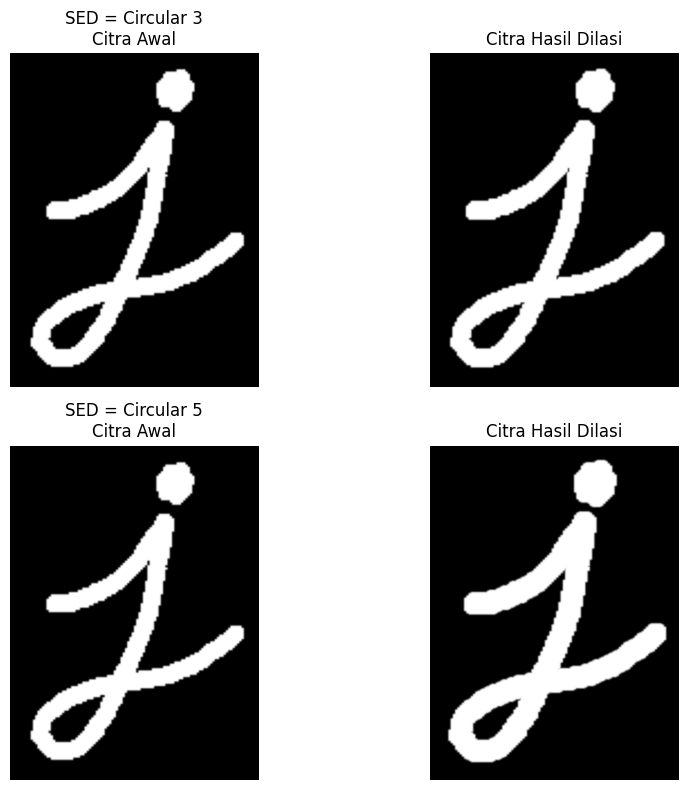

In [ ]:
# Membaca citra
img = cv2.imread('/content/drive/MyDrive/dataset/Minggu8/j.png')

# Fungsi untuk melakukan dilasi dan menampilkan hasil
def dilasi_and_display(img, se_size, iterations=1):
    # Membuat Structuring Element berbentuk Circular
    se_circular = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (se_size, se_size))

    # Melakukan dilasi
    dilasi = cv2.dilate(img, se_circular, iterations=iterations)

    return dilasi

# Melakukan dilasi untuk 3x3 dan 5x5
dilasi_circular_3x3 = dilasi_and_display(img, 3)
dilasi_circular_5x5 = dilasi_and_display(img, 5, iterations=2)  # Meningkatkan ketebalan dengan iterasi lebih banyak

# Menampilkan citra dengan format yang diinginkan
plt.figure(figsize=(10, 8))

# Baris pertama: SE Circular 3x3
plt.subplot(2, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('SED = Circular 3\nCitra Awal')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(cv2.cvtColor(dilasi_circular_3x3, cv2.COLOR_BGR2RGB))
plt.title('Citra Hasil Dilasi')
plt.axis('off')

# Baris kedua: SE Circular 5x5
plt.subplot(2, 2, 3)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('SED = Circular 5\nCitra Awal')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(cv2.cvtColor(dilasi_circular_5x5, cv2.COLOR_BGR2RGB))
plt.title('Citra Hasil Dilasi')
plt.axis('off')

plt.tight_layout()
plt.show()

### Penjelasan Kode:
1. **Membaca Citra:**
   - Citra dibaca menggunakan OpenCV dari file yang ditentukan. Ini adalah citra yang akan diolah.

2. **Fungsi `dilasi_and_display`:**
   - Fungsi ini menerima citra, ukuran structuring element (SE), dan jumlah iterasi sebagai parameter.
   - Membuat structuring element berbentuk elips (circular) menggunakan ukuran yang diberikan.
   - Melakukan dilasi pada citra menggunakan structuring element tersebut.
   - Mengembalikan citra hasil dilasi.

3. **Proses Dilasi:**
   - Dilasi pertama dilakukan dengan structuring element berukuran 3x3.
   - Dilasi kedua dilakukan dengan structuring element berukuran 5x5 dengan jumlah iterasi lebih banyak (2 iterasi) untuk meningkatkan ketebalan area yang dilasi.

### Hasil Output:
- **Citra Awal (SED = Circular 3):**
  - Menampilkan citra asli sebelum proses dilasi.
  
- **Citra Hasil Dilasi (3x3):**
  - Citra mengalami dilasi dengan structuring element 3x3, yang menyebabkan piksel putih pada citra diperluas. Hasilnya adalah area putih yang lebih besar dibandingkan citra asli, tetapi masih mempertahankan beberapa detail.

- **Citra Awal (SED = Circular 5):**
  - Citra asli ditampilkan sekali lagi untuk perbandingan dengan dilasi menggunakan SE yang lebih besar.

- **Citra Hasil Dilasi (5x5):**
  - Dengan structuring element 5x5 dan dua iterasi, hasil dilasi terlihat lebih signifikan. Area putih menjadi lebih tebal dan lebih sedikit detail yang tersisa, menunjukkan efek yang lebih kuat dari dilasi.

11. Buatlah program implementasi operasi erosi dengan Structuring Element berbentuk
Rectangle 3 x 5 dan 5 x 7, sehingga menghasilkan tampilan seperti di bawah ini:
(Gunakan gambar j.png)

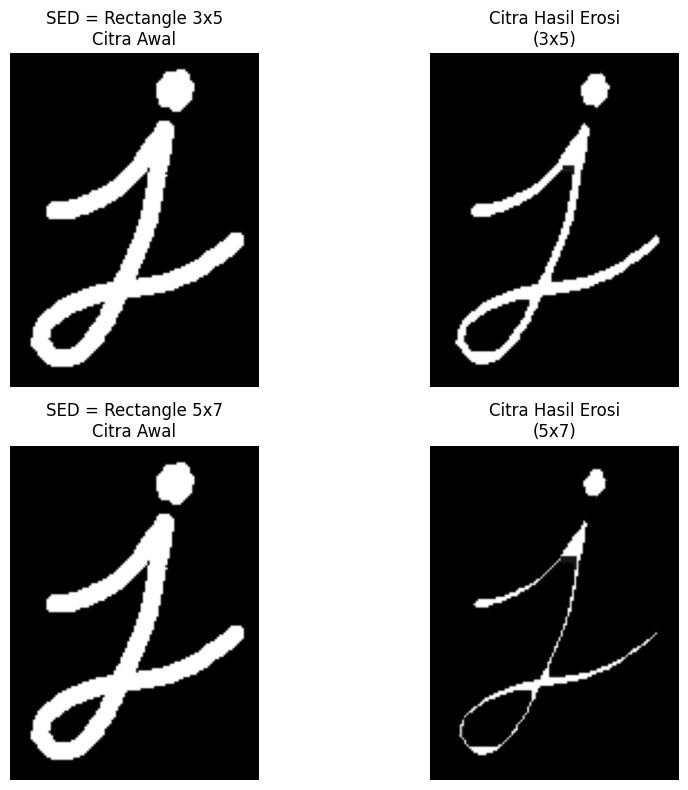

In [ ]:
# Membaca citra
img = cv2.imread('/content/drive/MyDrive/dataset/Minggu8/j.png')

# Fungsi untuk melakukan erosi dan menampilkan hasil
def erosi_and_display(img, se_size, iterations):
    # Membuat Structuring Element berbentuk Rectangle
    se_rectangle = cv2.getStructuringElement(cv2.MORPH_RECT, se_size)

    # Melakukan erosi dengan jumlah iterasi yang ditentukan
    erosi = cv2.erode(img, se_rectangle, iterations=iterations)

    return erosi

# Melakukan erosi untuk 3x5 dan 5x7 dengan iterasi yang sesuai
erosi_rectangle_3x5 = erosi_and_display(img, (5, 3), iterations=4)  # Rectangle 3x5
erosi_rectangle_5x7 = erosi_and_display(img, (7, 5), iterations=4)  # Rectangle 5x7

# Menampilkan citra dengan format yang diinginkan
plt.figure(figsize=(10, 8))

# Baris pertama: SE Rectangle 3x5
plt.subplot(2, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('SED = Rectangle 3x5\nCitra Awal')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(cv2.cvtColor(erosi_rectangle_3x5, cv2.COLOR_BGR2RGB))
plt.title('Citra Hasil Erosi\n(3x5)')
plt.axis('off')

# Baris kedua: SE Rectangle 5x7
plt.subplot(2, 2, 3)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('SED = Rectangle 5x7\nCitra Awal')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(cv2.cvtColor(erosi_rectangle_5x7, cv2.COLOR_BGR2RGB))
plt.title('Citra Hasil Erosi\n(5x7)')
plt.axis('off')

plt.tight_layout()
plt.show()

### Kode:
1. **Membaca Citra:** Citra dibaca dari file menggunakan OpenCV.
2. **Fungsi `erosi_and_display`:**
   - Membuat structuring element berbentuk persegi panjang.
   - Melakukan erosi pada citra dengan jumlah iterasi yang ditentukan.
3. **Proses Erosi:**
   - Erosi dilakukan dengan ukuran 3x5 dan 5x7, masing-masing dengan 4 iterasi.

### Hasil Output:
- **Citra Awal (3x5):** Menampilkan citra asli.
- **Citra Hasil Erosi (3x5):** Citra mengalami penyusutan area putih.
- **Citra Awal (5x7):** Citra asli ditampilkan untuk perbandingan.
- **Citra Hasil Erosi (5x7):** Penyusutan lebih besar dibandingkan sebelumnya, kehilangan lebih banyak detail.

### Kesimpulan:
Erosi dengan structuring element yang lebih besar (5x7) menyebabkan lebih banyak detail hilang dibandingkan dengan ukuran yang lebih kecil (3x5).

12. Buatlah program implementasi operasi erosi dengan Structuring Element berbentuk
Line Vertikal 3 dan 5, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan
gambar j.png)


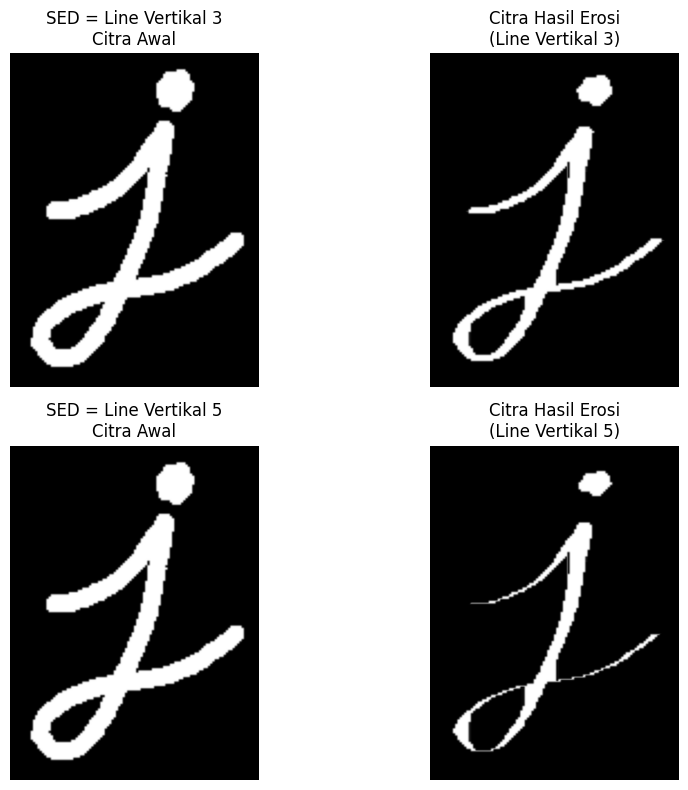

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Membaca citra
img = cv2.imread('/content/drive/MyDrive/dataset/Minggu8/j.png')

# Fungsi untuk melakukan erosi dan menampilkan hasil
def erosi_and_display(img, se_size, iterations):
    # Membuat Structuring Element berbentuk Line Vertikal
    se_line_vertical = cv2.getStructuringElement(cv2.MORPH_RECT, se_size)

    # Melakukan erosi dengan jumlah iterasi yang ditentukan
    erosi = cv2.erode(img, se_line_vertical, iterations=iterations)

    return erosi

# Melakukan erosi untuk Line Vertikal 3 dan 5
erosi_line_vertical_3 = erosi_and_display(img, (1, 5), iterations=5)  # Line Vertikal 3 dengan SE 1x5
erosi_line_vertical_5 = erosi_and_display(img, (1, 7), iterations=5)  # Line Vertikal 5 dengan SE 1x7

# Menampilkan citra dengan format yang diinginkan
plt.figure(figsize=(10, 8))

# Baris pertama: SE Line Vertikal 3
plt.subplot(2, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('SED = Line Vertikal 3\nCitra Awal')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(cv2.cvtColor(erosi_line_vertical_3, cv2.COLOR_BGR2RGB))
plt.title('Citra Hasil Erosi\n(Line Vertikal 3)')
plt.axis('off')

# Baris kedua: SE Line Vertikal 5
plt.subplot(2, 2, 3)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('SED = Line Vertikal 5\nCitra Awal')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(cv2.cvtColor(erosi_line_vertical_5, cv2.COLOR_BGR2RGB))
plt.title('Citra Hasil Erosi\n(Line Vertikal 5)')
plt.axis('off')

plt.tight_layout()
plt.show()


### Kode:
1. **Membaca Citra:** Citra dibaca dari file menggunakan OpenCV.
2. **Fungsi `erosi_and_display`:**
   - Membuat structuring element berbentuk garis vertikal.
   - Melakukan operasi erosi pada citra menggunakan structuring element yang telah dibuat.
3. **Proses Erosi:**
   - Erosi dilakukan dengan ukuran garis vertikal 1x5 dan 1x7, masing-masing dengan 5 iterasi.

### Hasil Output:
- **Citra Awal (Line Vertikal 3):** Menampilkan citra asli sebelum erosi.
- **Citra Hasil Erosi (Line Vertikal 3):** Citra mengalami penyusutan di bagian yang lebih luas, menghilangkan detail horizontal yang sempit.
- **Citra Awal (Line Vertikal 5):** Menampilkan citra asli untuk perbandingan.
- **Citra Hasil Erosi (Line Vertikal 5):** Erosi lebih terlihat, dengan pengurangan detail yang lebih besar dibandingkan dengan garis vertikal 1x5.

### Kesimpulan:
Erosi dengan structuring element yang lebih panjang (1x7) menyebabkan lebih banyak detail horizontal hilang daripada dengan ukuran yang lebih pendek (1x5), karena elemen ini lebih efektif dalam menghilangkan fitur yang lebih lebar pada citra.